<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Analyzing Historical Stock/Revenue Data and Building a Dashboard</h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=f0b5703507860753646739de15430837fd40077a8a056e31e06ad42cabacf245
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/77/8a/04/7b1a8ce5de6555a18e09370d3d4fde48be9571ac07a623071e
Successfully built bs4


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Question 1: Use yfinance to Extract Stock Data


We use the `Ticker` function to enter the stock we want and extract Tesla stock data.


In [31]:
tesla = yf.Ticker("TSLA")

In [32]:
tesla_data = tesla.history(period="max")

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. 

In [33]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named `html_data`.


In [34]:
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_html_data = requests.get(tesla_url).text

Parse the html data using `beautiful_soup`.


In [35]:
tesla_soup = BeautifulSoup(tesla_html_data, "html5lib")


Using beautiful soup extract the table with Tesla Quarterly Revenue and store it into a dataframe named `tesla_revenue`. We display the last five rows of the tesla_revenue dataframe using the `tail` function. 

In [36]:
tesla_tables = tesla_soup.find_all('table')

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)


In [37]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
50,2010-09-30,31
51,2010-06-30,28
52,2010-03-31,21
54,2009-09-30,46
55,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data

We use the `Ticker` function to enter the stock we want and extract GameStop stock data.


In [38]:
gamestop = yf.Ticker("GME")

In [39]:
gme_data = gamestop.history(period="max")

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 


In [40]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named `html_data`.

In [41]:
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_html_data = requests.get(gme_url).text

Parse the html data using `beautiful_soup`.

In [42]:
gme_soup = BeautifulSoup(gme_html_data, "html5lib")

Using beautiful soup extract the table with Tesla Quarterly Revenue and store it into a dataframe named `tesla_revenue`. We display the last five rows of the tesla_revenue dataframe using the `tail` function. 

In [43]:
gme_tables = gme_soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

In [44]:
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


## Question 5: Plot Tesla Stock Graph

Define `make_graph` functions

In [45]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph.

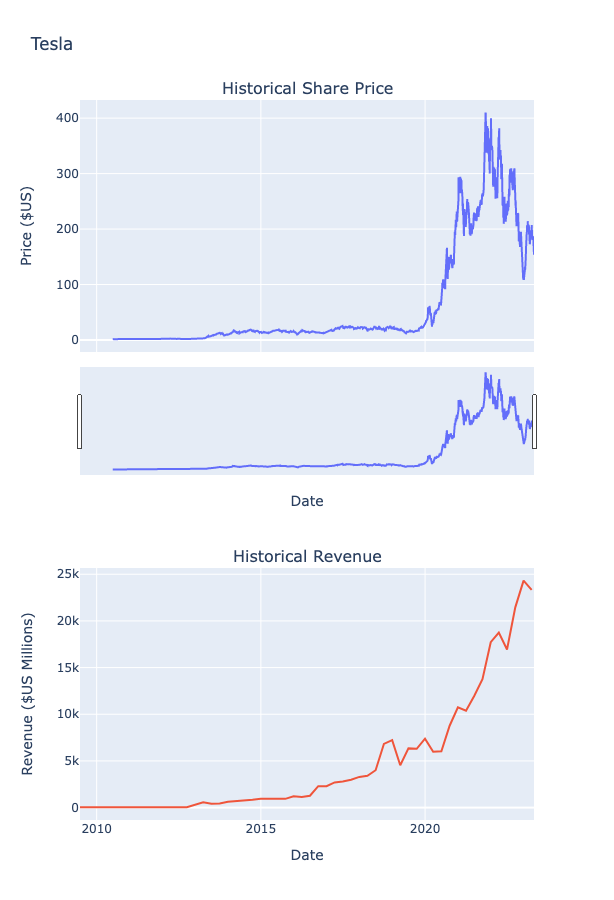

In [46]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph.

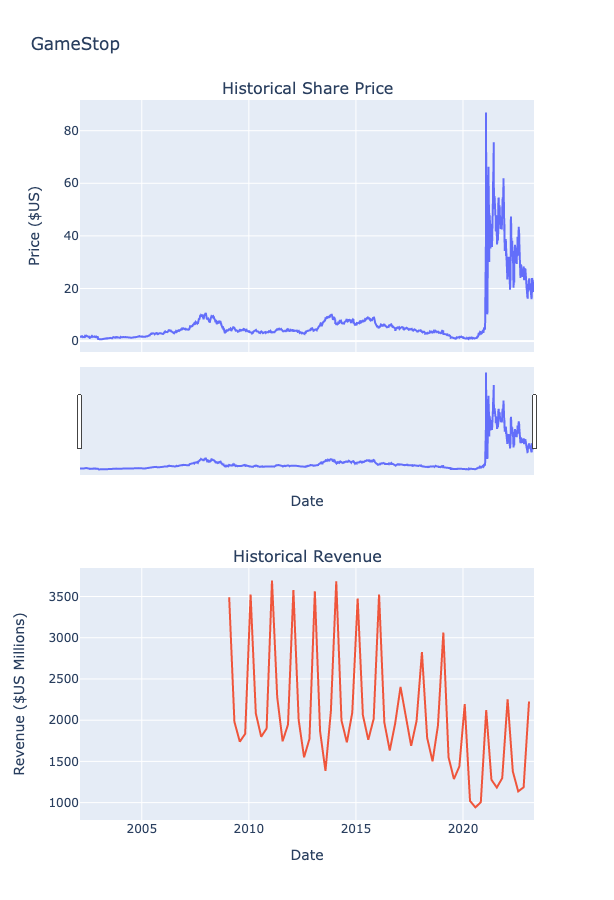

In [47]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>Author</h2> 

Lesley Liu
